One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

Step 1 — Importing Packages and Loading Data

In [89]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


import warnings; warnings.simplefilter('ignore')

In [476]:
# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_bitcoin = pd.read_csv("Bitcoin_data.csv", index_col = 0)


Step 2 - Create Time Series Data

In [477]:
# indexing 
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2019-07-15,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


Step 3 -  Split dataset as train and test data

Split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

In [479]:
df_bitcoin_train = df_bitcoin.loc[:"2018-07-01",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2018-07-02":,["Close"]]
df_bitcoin_train.sort_values("Date")


,Close
Date,
2013-04-28,134.21
2013-04-28,134.21
2013-04-29,144.54
2013-04-29,144.54
2013-04-30,139.00
...,...
2018-06-29,6218.30
2018-06-30,6404.00
2018-06-30,6404.00


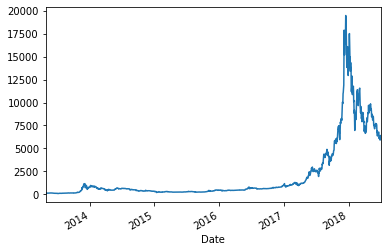

In [480]:
df_bitcoin_train['Close'].plot()

In [481]:
df_bitcoin_test.sort_values("Date")

,Close
Date,
2018-07-02,6614.18
2018-07-02,6614.18
2018-07-03,6529.59
2018-07-03,6529.59
2018-07-04,6597.55
...,...
2019-07-13,11392.38
2019-07-13,11392.38
2019-07-14,10256.06


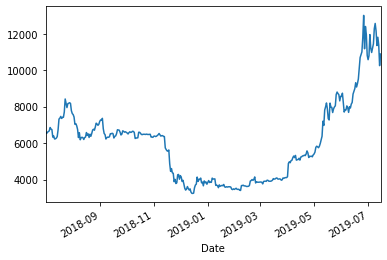

In [482]:
df_bitcoin_test['Close'].plot()

Step 4 - Check Stationary 

A stationary (time) series is one whose statistical properties such as the mean, variance and autocorrelation are all constant over time.

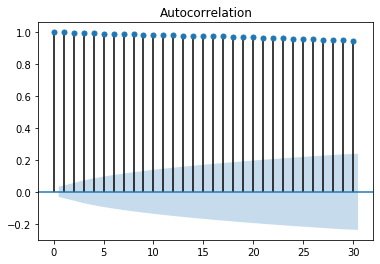

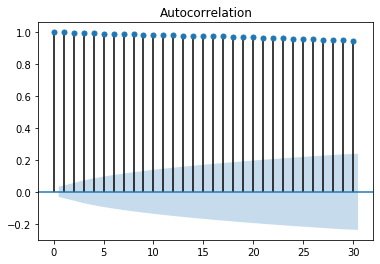

In [483]:
plot_acf(df_bitcoin_train.sort_values("Date"), lags=30)

Step 5 — The ARIMA Time Series Model

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

Step 6 - Parameter selection for the ARIMA Time Series Model using Gridsearch

In [484]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


print('Examples of parameter combinations for ARIMA...')
print('ARIMA:{}'.format(pdq[1]))
print('ARIMA:{}'.format(pdq[2]))
print('ARIMA:{}'.format(pdq[3]))
print('ARIMA:{}'.format(pdq[4]))
      


Examples of parameter combinations for ARIMA...
ARIMA:(0, 0, 1)
ARIMA:(0, 1, 0)
ARIMA:(0, 1, 1)
ARIMA:(1, 0, 0)


In [485]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
        
            mod = sm.tsa.ARIMA(df_bitcoin_train,
                                            order=param)

            results =  mod.fit()
        
            next 
            print("ARIMA{} - AIC:{}".format(param,results.aic))

ARIMA(0, 0, 0) - AIC:72118.35333559517
ARIMA(0, 0, 1) - AIC:67227.3154713334
ARIMA(0, 1, 0) - AIC:52766.813849227605
ARIMA(0, 1, 1) - AIC:52750.55767707002
ARIMA(1, 0, 0) - AIC:52782.36926885127
ARIMA(1, 0, 1) - AIC:52765.2668052786
ARIMA(1, 1, 0) - AIC:52751.88444636149
ARIMA(1, 1, 1) - AIC:52741.05386918642


Step 7 - Fitting an ARIMA Time Series Model

ARIMA(1,1,1) model. This sets the lag value to 1 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 1.

In [486]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 1, 1)).fit()

predictions = model.predict(
    start = len(df_bitcoin_train.sort_values("Date")),
    end = len(df_bitcoin_train.sort_values("Date")) + len(df_bitcoin_test.sort_values("Date")),
    dynamic=True,
)

predictions

3781   -1.436815
3782   -1.800819
3783   -1.565564
3784   -1.717609
3785   -1.619342
          ...   
4534   -1.657919
4535   -1.657919
4536   -1.657919
4537   -1.657919
4538   -1.657919
Length: 758, dtype: float64

In [487]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3781
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26366.527
Method:                       css-mle   S.D. of innovations            258.394
Date:                Mon, 02 Mar 2020   AIC                          52741.054
Time:                        01:51:09   BIC                          52766.005
Sample:                             1   HQIC                         52749.924
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6579      4.375     -0.379      0.705     -10.233       6.918
ar.L1.D.Close    -0.6463      0.077     -8.342      0.000      -0.798      -0.494
ma.L1.D.Close     0.7141      0.071     10.098      0.000       0.576       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5473           +0.0000j            1.5473            0.5000
MA.1           -1.4003           +0.0000j            1.4003            0.5000
-----------------------------------------------------------------------------
"""

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. 

The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

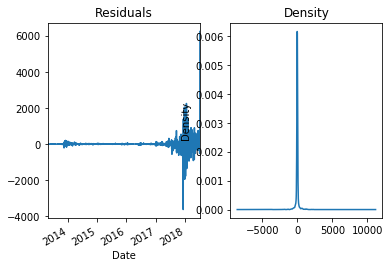

In [488]:
residuals = (model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Firstly, line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.
Next, density plot of the residual error values, suggesting the errors are Gaussian, but may be centered on zero.

Step 8 - Test accuracy 

In [489]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test.sort_values('Date'), predictions[1:]))




Mean absolute error:  6002.82412386324


Step 9 - Use of forecast( ) method 

In [520]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 1, 1)).fit()

forecast = model.forecast(len(df_bitcoin_test))[0]


In [521]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, forecast))

Mean absolute error:  6495.173157618956


Step 10 - Predict using different parameters 

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models.

In [515]:
model = sm.tsa.ARIMA(df_bitcoin_train, (0, 1, 1)).fit()

predictions = model.predict(
    start = len(df_bitcoin_train.sort_values("Date")),
    end = len(df_bitcoin_train.sort_values("Date")) + len(df_bitcoin_test.sort_values("Date")),
    dynamic=True, 
)

predictions 

3781   -1.487472
3782   -1.653428
3783   -1.653428
3784   -1.653428
3785   -1.653428
          ...   
4534   -1.653428
4535   -1.653428
4536   -1.653428
4537   -1.653428
4538   -1.653428
Length: 758, dtype: float64

In [516]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test.sort_values('Date'), predictions[1:]))

Mean absolute error:  6002.819517492909


In [517]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 1, 0)).fit()

predictions = model.predict(
    start = len(df_bitcoin_train.sort_values("Date")),
    end = len(df_bitcoin_train.sort_values("Date")) + len(df_bitcoin_test.sort_values("Date")),
    dynamic=True, 
)

predictions  

3781   -1.542929
3782   -1.646043
3783   -1.652935
3784   -1.653395
3785   -1.653426
          ...   
4534   -1.653428
4535   -1.653428
4536   -1.653428
4537   -1.653428
4538   -1.653428
Length: 758, dtype: float64

In [518]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test.sort_values('Date'), predictions[1:]))

Mean absolute error:  6002.81950756469


Conclusion

This project investigated bitcoin price prediction by using an ARIMA model. Towards this end, at first I have preprocessed data to make it stationary, and then, have searched over feasible (p, q, d) tuples for finding the ARIMA model which minimizes the MAE of prediction. The results indicate that the bitcoin price prediction using its closing price history could results in large MAE values due to bitcoin’s price vulnerability to high jumps and fall-downs. Moreover, the results confirm that the ARIMA model could be still used for price prediction in sub-periods of the timespan, i.e. by dividing the timespan to several time-spans over which, dataset has a unique trend. Furthermore, I have investigated that the results demonstrated that ARIMA outperforms most other methods in predicting bitcoin prices on a daily time series basis in terms of mean absolute error (MAE). 